In [1]:
import pandas as pd

data = pd.read_parquet('../data/training_data.parquet')
data.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
40617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spreadsheet
102513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spreadsheet
337367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spreadsheet
387316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,airplane
354662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spreadsheet


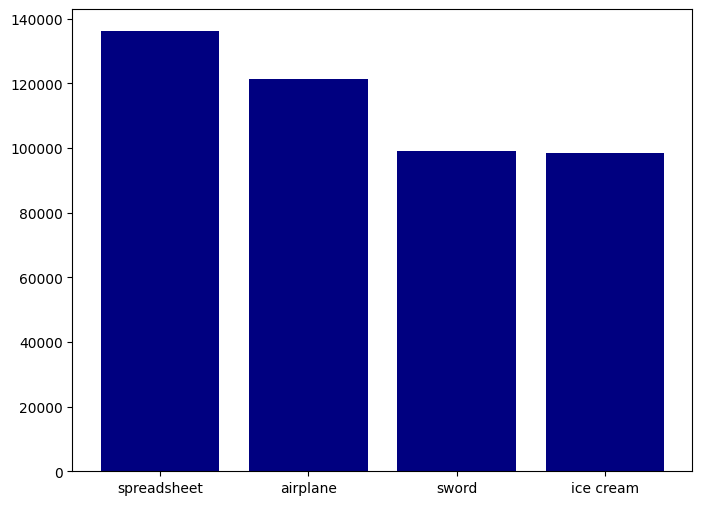

In [2]:
import matplotlib.pyplot as plt

frequncies = data['label'].value_counts().reset_index()

plt.figure(figsize = (8, 6))
plt.bar(frequncies['label'], frequncies['count'], color = 'navy')
plt.show()

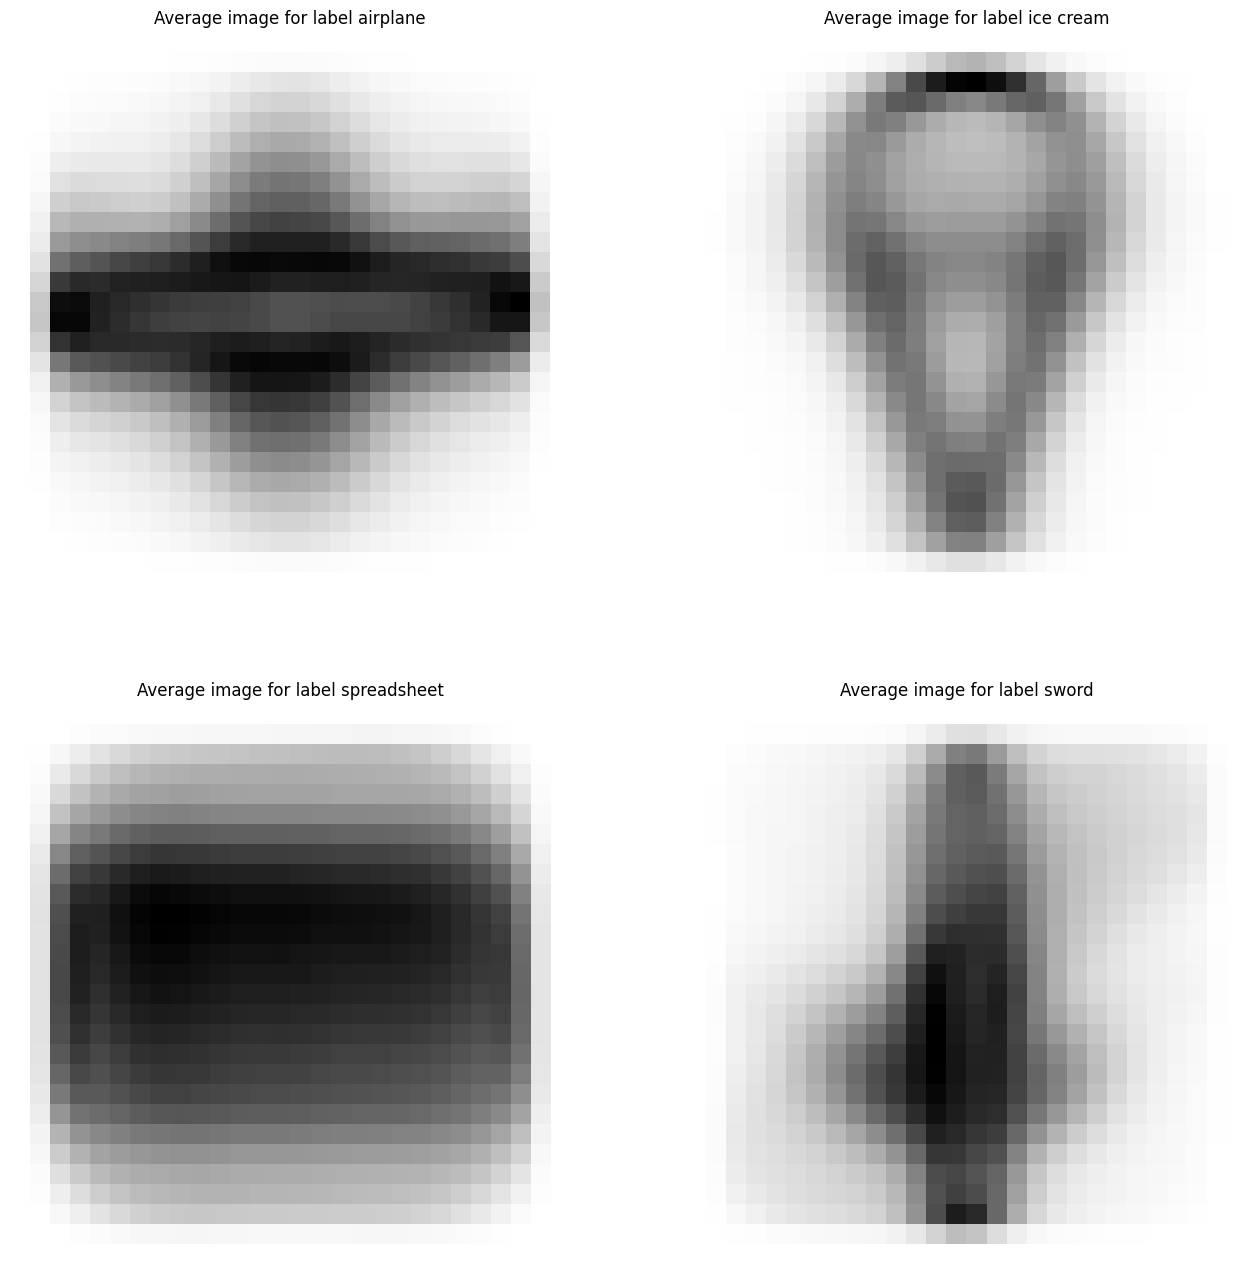

In [3]:
import numpy as np

avg_img = data.groupby('label').mean().reset_index()
avg_img.head()

fig, axes = plt.subplots(2, 2, figsize = (16, 16))

for i, ax in enumerate(axes.flatten()):
    img = avg_img.iloc[i, 1:].to_numpy().astype(np.float32).reshape(28, 28)
    ax.imshow(img, cmap='gray_r')
    ax.set_title(f'Average image for label {avg_img.iloc[i, 0]}')
    ax.axis('off')

plt.show()